<a href="https://colab.research.google.com/github/saradom11/M-todos-num-ricos-1/blob/main/Metodo_de_Steffensen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Método de Steffensen **

#Resuelva la ecuación $f(x) = cos(x) - 2x + 3 = 0$ con una precisión de 0.00001.


In [52]:
from math import *
import numpy as np
import matplotlib . pyplot as plt

In [53]:
def f(x):
    return np.cos(x) - 2*x + 3  # Definimos la función
def g(x):
    return (np.cos(x) + 3) / 2  # Definimos la función g(x)

In [54]:
# Verificar que la función original es continua
f1 = f(1)
f2 = f(2)

print(f"f(1) = {f1:.4f}")  # Redondeamos a 4 decimales
print(f"f(2) = {f2:.4f}")

#Evaluamos en 2 valores para verificar que la nueva ecuación tambien esta continua
g1 = g(1)
g2 = g(2)

print(f"g(1) = {g1:.4f}")  # Redondeamos a 4 decimales
print(f"g(2) = {g2:.4f}")

f(1) = 1.5403
f(2) = -1.4161
g(1) = 1.7702
g(2) = 1.2919


In [55]:
# Parámetros iniciales
p0 = 1  # Valor inicial
tolerancia = 0.00001  # Precisión
max_iter = 100  # Número máximo de iteraciones

In [56]:
# Método de Steffensen:

# Imprimir encabezado de la tabla
print("{:^10} | {:^12} | {:^12} | {:^12}".format("Iteración", "p_n", "p_n+1", "Error"))
print('------------------------------------------------------')

# Método de Steffensen
for i in range(1, max_iter + 1):
    # Calcular valores necesarios para la extrapolación de Aitken
    g_p0 = g(p0)  # g(p0)
    p1 = g_p0     # p1 = g(p0)
    g_p1 = g(p1)  # g(p1)
    p2 = g_p1     # p2 = g(p1)

    # Verificamos que no haya división por cero
    denom = p2 - 2*p1 + p0
    if abs(denom) < 0.000000001:  # Si el denominador es muy pequeño, detener la iteración
        print("División por un valor cercano a cero.")
        break

    # Aplicamos la fórmula de Steffensen
    p = p2 - ((p2 - p1)**2) / denom

    # Calculamos el error
    error = abs(p - p0)

    # Imprimimos los resultados de cada iteración
    print("{:^10} | {:^12.6f} | {:^12.6f} | {:^12.6f}".format(i, p0, p, error))

    # Verificamos la condición de parada
    if error < tolerancia:
        print(f"\nLa solución aproximada es p = {p:.6f} con un error de {error:.6f}")
        break

    # Actualizamos p0 para la siguiente iteración
    p0 = p

Iteración  |     p_n      |    p_n+1     |    Error    
------------------------------------------------------
    1      |   1.000000   |   1.520602   |   0.520602  
    2      |   1.520602   |   1.523593   |   0.002991  
    3      |   1.523593   |   1.523593   |   0.000000  

La solución aproximada es p = 1.523593 con un error de 0.000000


In [57]:
# Valores del eje x que toma el gráfico.
x=np.linspace(-50, 50,400)

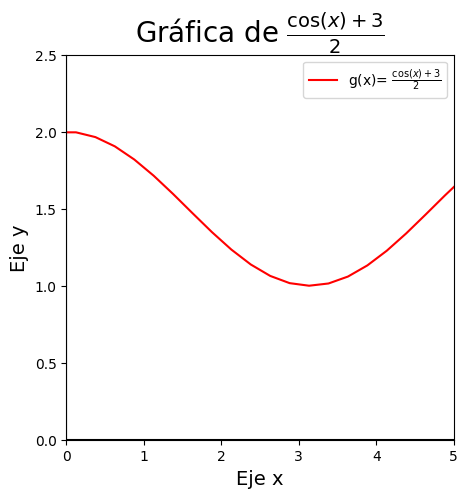

In [58]:
# Gráfica de la función
plt.figure(figsize=(5,5))
plt.title(r'Gráfica de $\frac{\cos(x) + 3}{2}$', fontsize=20)
plt.xlabel('Eje x', fontsize=14)
plt.ylabel('Eje y', fontsize=14)
plt.plot(x, g(x), color="red", label=r'g(x)= $\frac{\cos(x) + 3}{2}$')
plt.axhline(0, color="black")
plt.axvline(0, color="black")
plt.xlim(0, 5)
plt.ylim(0, 2.5)
# Mostrarlo.
plt.legend()
plt.show()